In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import os

In [44]:
Simulated_LCs_Speed_07mps_dir = "./data/2022-09-21_LaneChanges/Simulated_LCs/Simulated_Speed_07mps/"
Simulated_LCs_Speed_14mps_dir = "./data/2022-09-21_LaneChanges/Simulated_LCs/Simulated_Speed_14mps/"
Simulated_LCs_Speed_Various_dir = "./data/2022-09-21_LaneChanges/Simulated_LCs/Simulated_Speed_Various/"
Simulated_LCs_Valid_dir = "./data/2022-09-21_LaneChanges/Simulated_LCs/Simulated_Valid/"


In [45]:
chosen_directory = Simulated_LCs_Valid_dir

df_arr = []

# Iterate through directory and append df to df list
for file in os.listdir(chosen_directory):
    # note: they use ',' as separator instead of ';'
    df = pd.read_csv(chosen_directory + file, sep=',')
    df_arr.append(df)


In [46]:
#df_arr[0].plot(x = "location_x", y = "location_y")

File: 0 is a valid LC with delta: 2.933990478515625
File: 1 is a valid LC with delta: 3.9422454833984375
File: 2 is a valid LC with delta: 3.9547500610351562
File: 3 is a valid LC with delta: 3.3985824584960938
File: 4 is a valid LC with delta: 4.469993591308594


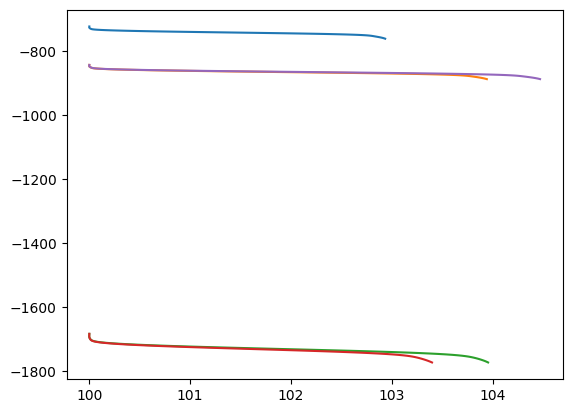

In [47]:
# Lane and car parameters (Germany: 3.5m to 3.7m)
LANE_WIDTH = 3.7
CAR_WIDTH = 2

# Minimum and maximum sideways distances car must move to perform a LC of one lane
MIN_DELTA_X = (LANE_WIDTH/2) + (CAR_WIDTH/2)
MAX_DELTA_X = LANE_WIDTH + (LANE_WIDTH/2) - (CAR_WIDTH/2)

# Strict case constraint (optional): car must move within 0.5m of lane borders
# MIN_DELTA_X += 0.5
# MAX_DELTA_X -= 0.5

for i in range(0, len(df_arr)):
    curr_df = df_arr[i]
    plt.plot(curr_df["location_x"],curr_df["location_y"])
    start_x = curr_df['location_x'].iloc[0]
    end_x = curr_df['location_x'].iloc[-1]
    delta_x = end_x - start_x
    if (delta_x >= MIN_DELTA_X and delta_x <= MAX_DELTA_X):
        print("File:", i, "is a valid LC with delta:", delta_x)
    if (delta_x < MIN_DELTA_X):
        print("File:", i, "steered inside the initial lane with delta:", delta_x)
    if (delta_x > MAX_DELTA_X):
        print("File:", i, "steered more than one lane with delta:", delta_x)
    

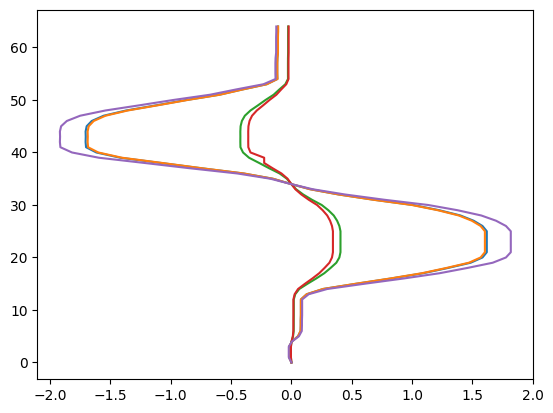

In [48]:
for i in range(0, len(df_arr)):
    curr_df = df_arr[i]
    plt.plot(curr_df['SteeringWhlAngle'], curr_df['Unnamed: 0'], label = "Simulated LC")
    #if (curr_df.)

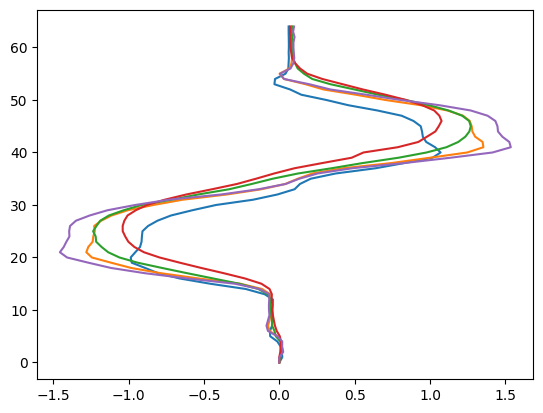

In [49]:
for i in range(0, len(df_arr)):
    curr_df = df_arr[i]
    plt.plot(curr_df['IMULatAcceleration'], curr_df['Unnamed: 0'], label = "Simulated LC")